### REGRESSION in PYTHON:

### Linear Regression with Python:

From [this source](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb)

In [44]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [45]:
data.shape

(200, 4)

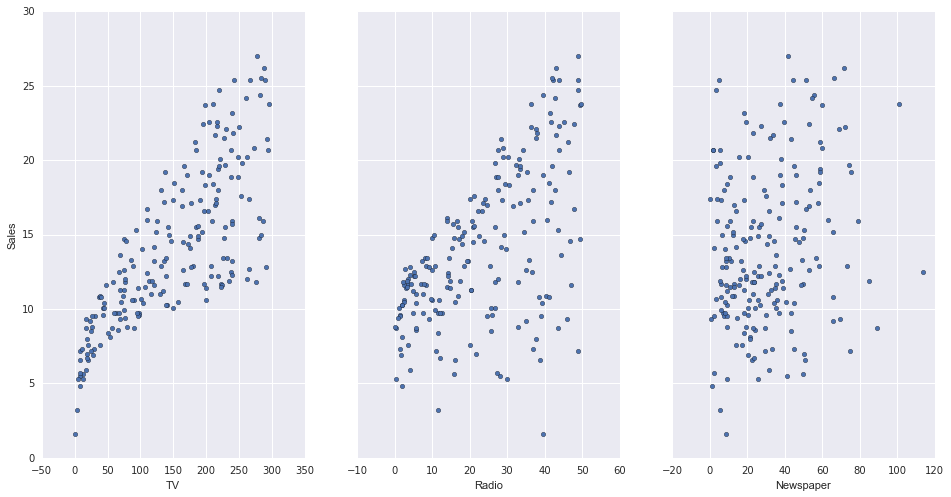

In [46]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [47]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [48]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [49]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 9.40942557])

In [50]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [51]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([  7.0658692 ,  21.12245377])

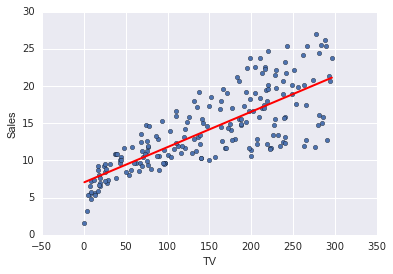

In [52]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [53]:

# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [54]:

# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [55]:
# print the R-squared value for the model
lm.rsquared

0.61187505085007099

#### Different methods:

##### Loading datasets usually available in R - From [here](https://stackoverflow.com/a/34943480/4089351)

In [56]:
%matplotlib inline
# To install a package go to the cmd prompt and type for example, pip install seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.stats.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.api import add_constant

### Regression with seaborn:

In [57]:
iris = sns.load_dataset("iris")

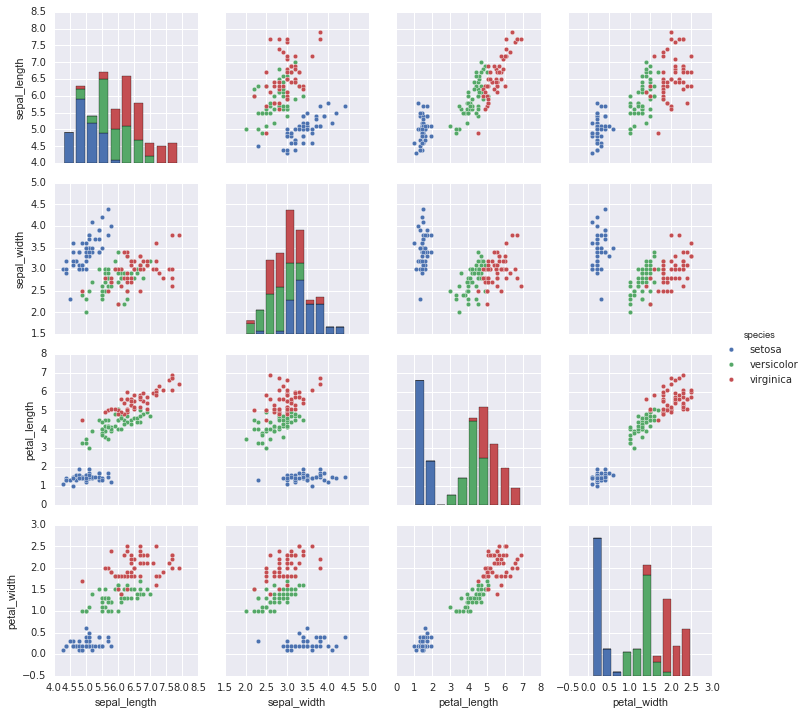

In [58]:
sns.pairplot(iris, hue="species")
sns.plt.show()

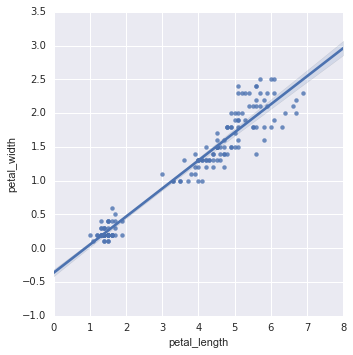

In [59]:
sns.lmplot(x="petal_length", y="petal_width", data=iris)
sns.plt.show()

### Regression with statsmodels:

In [60]:
from pydataset import data
iris = data('iris')

initiated datasets repo at: C:\Users\Antoni\.pydataset/


In [61]:
iris['Sepal.Length'][1:3]

2    4.9
3    4.7
Name: Sepal.Length, dtype: float64

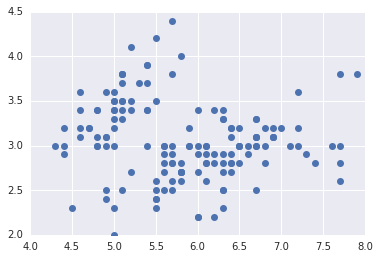

In [62]:
plt.plot(iris['Sepal.Length'], iris['Sepal.Width'], "o")

In [63]:
fit = ols(y = iris['Sepal.Length'], x  = iris['Petal.Width'])
fit

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         150
Number of Degrees of Freedom:   2

R-squared:         0.6690
Adj R-squared:     0.6668

Rmse:              0.4780

F-stat (1, 148):   299.1673, p-value:     0.0000

Degrees of Freedom: model 1, resid 148

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.8886     0.0514      17.30     0.0000     0.7879     0.9893
     intercept     4.7776     0.0729      65.51     0.0000     4.6347     4.9206
---------------------------------End of Summary---------------------------------

In [64]:
mod = sm.OLS(iris['Sepal.Length'],add_constant(iris['Petal.Width']))

In [65]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Sepal.Length   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     299.2
Date:                Wed, 07 Jun 2017   Prob (F-statistic):           2.33e-37
Time:                        15:01:44   Log-Likelihood:                -101.11
No. Observations:                 150   AIC:                             206.2
Df Residuals:                     148   BIC:                             212.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.7776      0.073     65.506      

In [66]:
mod.fit().params

const          4.777629
Petal.Width    0.888580
dtype: float64

In [67]:
mtcars = data('mtcars')

In [68]:
mtcars[0:3:]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [69]:
gen = smf.glm(formula = "mtcars['cyl'] ~ mtcars['mpg']", data = mtcars, family=sm.families.Poisson()).fit()

In [70]:
print(gen.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          mtcars['cyl']   No. Observations:                   32
Model:                            GLM   Df Residuals:                       30
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -60.471
Date:                Wed, 07 Jun 2017   Deviance:                       4.2822
Time:                        15:01:45   Pearson chi2:                     4.19
No. Iterations:                     7                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         2.6857      0.255     10.522      0.000         2.185     3.186
mtcars['mpg']    -0.0446      0.013     -3.